# Reinforcement Learning Tutorial <a class="tocSkip">

# Formalizing a sequential decision problem as an MDP
Consider the following environment:
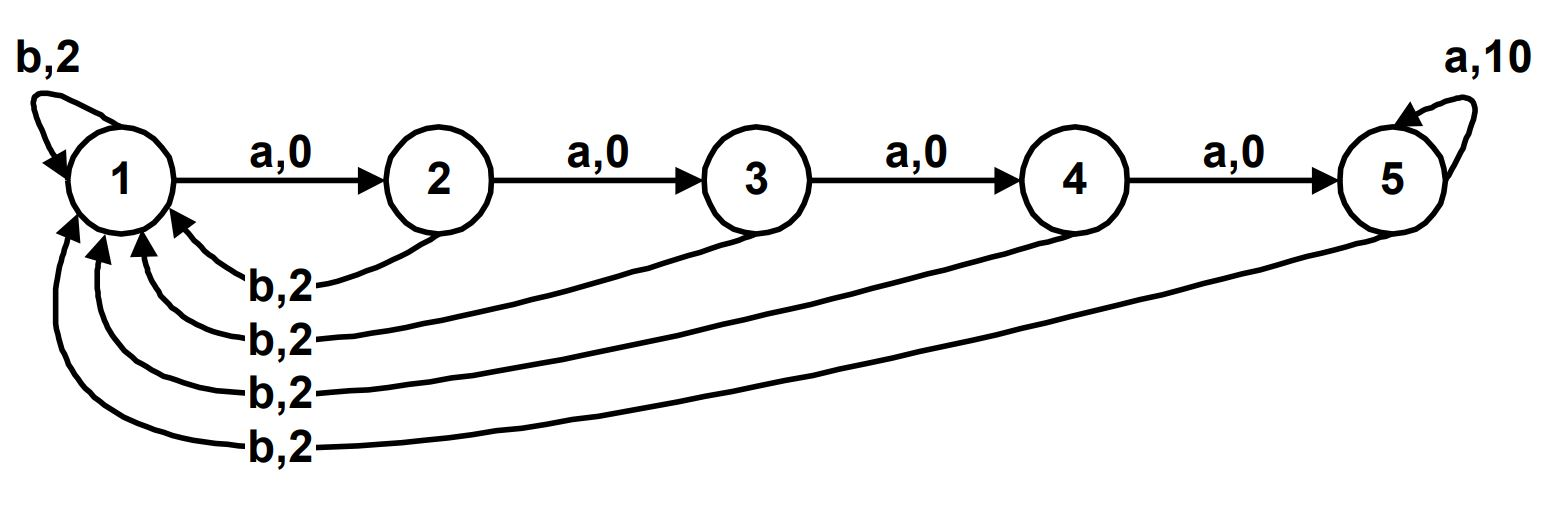

There are 5 numbered states. An agent can perform 2 actions: Action $a$ (go right) or Action $b$ (return to state $(1)$). The agent gains a reward = $2$ whenever by using action $b$ in every state or a reward = $10$ when selecting action $a$ in state $(5)$. Otherwise he gets a reward = $0$. When action a is performed in state $(5)$ the agent will remain there.

Define the transition probabilities as a numpy array of shape ($\#$Actions, $\#$States, $\#$States).

Define the reward function as a numpy array of shape ($\#$Actions, $\#$States).

Now change the transition function you defined to make it stochastic. When an agent selects an action let it happen the outcome of the other action with probability $p = 0.1$ except for the last state where it will happen with $p = 0.2$.

From "A Bayesian framework for reinforcement learning", Malcolm Strens,
https://www.ece.uvic.ca/~bctill/papers/learning/Strens_2000.pdf

Please run the following piece of code to load numpy and to define the problem's parameters

In [2]:
import numpy as np
# Sizes of the state/action spaces
nbS, nbA = 5, 2
# Problem parameters: probability values and rewards
pr, pr_last = 0.9, 0.8
rstay, rmax = 2, 10

Let's define the transition and reward functions: for that, fill in the following code:

In [27]:
# Transition matrices
T = np.zeros((nbA, nbS, nbS))
# Reward vectors
R = np.zeros((nbA, nbS))

# From first states
for i in range(nbS-1):
  T[0, i, i+1] = pr
  T[0, i, 0] = 1 - pr
  T[1, i, 0] = pr
  T[1, i, i+1] = 1 - pr
  R[1, i] = rstay

# From the last state
T[0, nbS-1, nbS-1] = pr_last
T[0, nbS-1, 0] = 1 - pr_last
T[1, nbS-1, 0] = pr_last
T[1, nbS-1, nbS-1] = 1 - pr_last
R[0, nbS-1] = rmax
R[1, nbS-1] = rstay

# Check that the transition matrix contains probability distributions
action_names = ['a','b']
for a in range(2):
  if np.any(np.sum(T[a,:,:],axis=1)==np.ones(nbS)):
    print('Transition matrix of action', action_names[a], 'well normalized.')
    print(T[a,:,:])
  else:
    print('WARNING: transition matrix of action', action_names[a], 'NOT normalized.')

# Reward vectors
for a in range(2):
  print('Reward for action', action_names[a])
  print(R[a,:])

Transition matrix of action a well normalized.
[[0.1 0.9 0.  0.  0. ]
 [0.1 0.  0.9 0.  0. ]
 [0.1 0.  0.  0.9 0. ]
 [0.1 0.  0.  0.  0.9]
 [0.2 0.  0.  0.  0.8]]
Transition matrix of action b well normalized.
[[0.9 0.1 0.  0.  0. ]
 [0.9 0.  0.1 0.  0. ]
 [0.9 0.  0.  0.1 0. ]
 [0.9 0.  0.  0.  0.1]
 [0.8 0.  0.  0.  0.2]]
Reward for action a
[ 0.  0.  0.  0. 10.]
Reward for action b
[2. 2. 2. 2. 2.]


## VALUE ITERATION ALGORITHM

Fill in the following function to get the VI algorithm

In [37]:
def value_iteration(t,r,gamma,epsilon):
    v = np.max(r,axis=0)
    vtemp = np.max(r + gamma * np.dot(t,v), axis=0)
    n=0
    history = []
    while np.linalg.norm(v-vtemp)>epsilon:
        v = vtemp
        history.append(vtemp)
        # Dynamic Programming equation
        vtemp = np.max(r + gamma * np.dot(t,v), axis=0) # a function of v...
        n += 1
    print('VI ends after', n,'iterations.')
    return v, history

Use this function with the problem parameters to get the value function. 
- What happens with decreasing gamma > 0 ? 
- Same question with epsilon.

In [38]:
V, v_history = value_iteration(T,R,gamma=0.9,epsilon=0.01)
print(V)

VI ends after 65 iterations.
[33.85824711 38.04355124 43.21059338 49.58965775 57.46504587]


In [ ]:

plt.plot(v_history)

Please extract the optimal policy by computing the Q-value function.

In [45]:
gamma = 0.9
# definition of the Q value 
# associated to the value function V:
Q = R + gamma * np.dot(T,V) # a function of the value function V
print(Q)
# the optimal policy is the greedy policy
# associated to the optimal Q value:
opt_pol = np.argmax(Q,axis=0)
print(opt_pol)

[[33.86251875 38.04782288 43.21486502 49.59392939 57.4693175 ]
 [32.84909977 33.31413356 33.88824936 34.59703429 36.72164617]]
[0 0 0 0 0]


In [44]:
np.dot(T,V)

array([[37.62502083, 42.27535876, 48.01651669, 55.10436599, 52.74368611],
       [34.27677752, 34.79348174, 35.43138817, 36.21892698, 38.57960686]])

## POLICY ITERATION ALGORITHM

We are now going to implement PI: this algorithm has 2 steps:
- policy evaluation,
- policy improvement.


When evaluating the policy, we use the transition matrix and the reward vector associated to this policy. This is the purpose of the following function.

In [39]:
def policy_expectation(transition, reward, policy):
    # reward vector
    state_reward = np.zeros(nbS, dtype=np.float64)
    # transition matrix
    trans_markov_chain = np.eye(nbS, dtype=np.float64)
    for s in range(nbS):
        # action selected by the policy for this state
        index = policy[s]
        # transition distribution from this state with this action
        trans_markov_chain[s] = transition[index, s]
        # reward associated to this state and this action
        state_reward[s] = reward[index,s]
    return state_reward, trans_markov_chain

Let's consider a policy:

In [40]:
p = np.random.randint(0,2, size=5)
print(p)

[1 0 0 1 0]


The associated transition matrix and reward are:

In [41]:
r, t = policy_expectation(T, R, p)
print('Transition matrix:\n', t)
print('Reward vector:\n', r)

Transition matrix:
 [[0.9 0.1 0.  0.  0. ]
 [0.1 0.  0.9 0.  0. ]
 [0.1 0.  0.  0.9 0. ]
 [0.9 0.  0.  0.  0.1]
 [0.2 0.  0.  0.  0.8]]
Reward vector:
 [ 2.  0.  0.  2. 10.]


We can now evaluate a policy given its transition matrix and its reward vector. It can be done by iterating the Bellman Equation (like in VI without the max), but in our case, we can solve the linear system of the Bellman equation using np.linalg.inv(). 

In [46]:
def policy_evaluation(transition, reward, policy, gamma):
    # Compute the reward vector and the transition matrix
    r, tmc = policy_expectation(transition, reward, policy)
    # Compute the left side matrix of the linear system
    z = np.eye(tmc.shape[0], dtype=np.float64) - gamma * tmc
    # Inverse this matrix using linalg.inv
    z = np.linalg.inv(z)
    # Multiply the inverse by the reward vector
    v = np.dot(z,r)
    return v

Test this function on the previous arbitrary policy.

In [47]:
v = policy_evaluation(T, R, p, 0.9)
print('Policy:', p)
print('Associated Value function:', v)


Policy: [1 0 0 1 0]
Associated Value function: [18.59814938 17.04053757 18.97123966 21.35482249 47.67023888]


We are now ready to implement Policy Iteration. Please fill the following code for that.

In [48]:
def policy_iteration(t, r, gamma):
    q = np.copy(r)
    # extract the greedy policy w.r.t. the reward function 
    policy = np.argmax(q, axis=0)
    # evaluate this policy, i.e. compute the associated value function
    v = policy_evaluation(t, r, policy, gamma)
    # compute the Q value associated to the value function
    q = r + gamma * np.dot(t,v)
    changed = True
    n = 0
    while changed:
      n += 1
      # POLICY IMPROVEMENT
      # extract the greedy policy w.r.t. the Q value
      new_pol = np.argmax(q, axis=0)
      print(new_pol)
      # tests if there is a change in policy
      if np.any(new_pol != policy):
        changed = True
        policy = new_pol
        # POLICY EVALUATION
        # evaluate this policy, i.e. compute the associated value function
        v = policy_evaluation(t, r, new_pol, gamma)
        # compute the Q value associated to the value function
        q = r + gamma * np.dot(t,v)
      else:
        changed = False
        print('PI ends after', n, 'iterations.')
    return policy

In [49]:
optimal_policy = policy_iteration(T, R, gamma=0.9)
print('Optimal policy:', optimal_policy)

[1 1 1 0 0]
[1 1 0 0 0]
[1 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 0]
PI ends after 5 iterations.
Optimal policy: [0 0 0 0 0]


So far so good. With gamma = 0.9 the optimal policy is the one that pushes the agent to go always right!

Find the greatest gamma that makes the optimal policy different. What does it mean? Please interpret the result.

# REINFORCEMENT LEARNING

## Use an OpenAI environment

There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop him off in another. You receive +20 points for a successful dropoff, and lose 1 point for every timestep it takes. There is also a 10 point penalty for illegal pick-up and drop-off actions.

https://gym.openai.com/envs/Taxi-v3/

In [1]:
import gym
# choose an environment
env = gym.make("Taxi-v3").env
# illustration of a random state
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [2]:
# reset the environment to a new, random state
env.reset()
env.render()

print("Action Space:", env.action_space)
print("State Space:", env.observation_space)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space: Discrete(6)
State Space: Discrete(500)


In [3]:
# set a state
state = env.encode(2, 2, 3, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 252
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
from IPython.display import clear_output
from time import sleep

# simulation of 50 steps
horizon = 50

# store the current epoch, the number of received penalties, and the current rewards
epochs, penalties, reward, = 0, 0, 0

# start simulation
env.reset()
done = False
while not done:
    # select a random action
    action = env.action_space.sample()
    
    # use the action, and get next state and reward
    next_state, reward, done, info = env.step(action) 
    
    # display the state of the system
    clear_output(wait=True)
    print('epoch', epochs)
    env.render()

    # penalty counter
    if reward == -10:
        penalties += 1

    # update the system state and the time step variables 
    state = next_state
    epochs += 1
    
    # stop if the horizon is reached
    if epochs==horizon:
        done = True
    sleep(.1)

epoch 49
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)


## Implement the Q learning algorithm

In [29]:
import numpy as np
import random

from tqdm.notebook import tqdm, trange

# creation of the Q value function
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 0.1
nb_epochs = 5000

# For plotting metrics
all_epochs = []
all_penalties = []


for i in trange(nb_epochs, desc="Epoch"):
    
    # simulation initialization
    state = env.reset()
    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    # start simulation
    while not done:
        # trade-off Exploration-Exploitation
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values
        
        # apply action, get next state and reward
        next_state, reward, done, info = env.step(action) 
        
        # update the Q value function
        
        old_value = q_table[state, action]
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * np.max(q_table[next_state,:])) # ???
        q_table[state, action] = new_value

        # penalty counter
        if reward == -10:
            penalties += 1

        # update the system state and the time step variables 
        state = next_state
        epochs += 1
    
    all_epochs.append(epochs)
    all_penalties.append(penalties)

print("Training finished.")


Training finished.


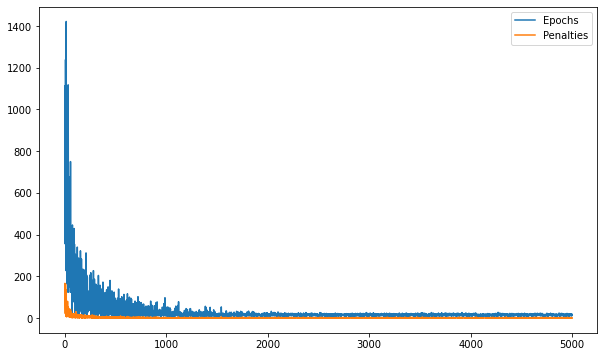

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(all_epochs[:10000], label="Epochs")
plt.plot(all_penalties[:10000], label="Penalties")
plt.legend()
plt.show()

## Evaluation of the agent

In [40]:
total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print("Results after", episodes, "episodes:")
print("Average timesteps per episode:", total_epochs/episodes)
print(f"Average penalties per episode:", total_penalties/episodes)

Results after 100 episodes:
Average timesteps per episode: 12.68
Average penalties per episode: 0.0


## Display the trained agent

In [59]:
env.reset()
done = False    
while not done:
    # Exploit learned values to choose next action
    action = np.argmax(q_table[state])
    state, r, done, _ = env.step(action) 
    # display
    clear_output(wait=True)
    env.render()
    sleep(.1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


# RL algorithms
Now, please implement:
- Monte-Carlo,
- TD(0),
- SARSA.

Test these algorithms on other Gym environment.

## Monte-Carlo

In [79]:
# environment
env = gym.make("Taxi-v3").env
env.reset()
env.render()
env.nS, env.nA

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



(500, 6)

In [ ]:
def generate_traj(env, policy, max_steps=300):
    s = env.reset()
    states = []
    rewards = []
    step = 0
    done = False
    while not done and step <= max_steps:
        a = policy(s)
        ns, r, done, _ = env.step(a)
        states.append(ns)
        rewards.append(r)
        s = ns
        step += 1
    return states, rewards


In [89]:
# parameters
nb_episode = 1000
gamma = 0.9

N = np.zeros(env.observation_space.n)
G = np.zeros(env.observation_space.n)
V = np.zeros(env.observation_space.n)

policy = lambda s: env.action_space.sample()
for i in trange(nb_episode):
    states, rewards = generate_traj(env, policy)
#     tqdm.write(f"Generate trajectory of {len(states)} steps")
    visited = set()
    for t, s in enumerate(states):
        if s not in visited:
            N[s] += 1
            G[s] = np.sum([gamma**(i-t) * rewards[i] for i in range(t, len(rewards))])
            V[s] += 1/N[s] * (G[s] - V[s])
            visited.add(s)

print(V)


[ 20.         -31.90250206 -31.33459002 -30.218734   -35.24473923
   0.         -35.7769126  -37.74823803 -36.04925801 -37.42270489
   0.         -35.46848659 -36.63078126 -36.10042166 -35.72786818
   0.         -13.45444011 -31.54888839 -28.61156345 -31.2785615
   0.         -34.8339889  -36.01945165 -34.70641263 -35.52251242
   0.         -35.93147028 -36.89435983 -36.15387761 -36.49736777
   0.         -36.45380459 -38.10148181 -34.16476628 -37.44329081
   0.         -20.47527241 -36.55920471 -30.35568931 -32.54878632
   0.         -36.75181384 -38.37320212 -40.37279614 -36.70967967
   0.         -37.95280567 -37.27203568 -36.751536   -37.25735985
   0.         -37.14881877 -37.7430156  -38.44007307 -36.86235135
   0.         -35.95523051 -33.33015221 -32.81979633 -33.46430743
   0.         -36.29476953 -35.89738633 -38.43888912 -34.75852014
   0.         -36.09337081 -37.1283353  -36.02610286 -38.17391336
   0.         -36.69798625 -37.56503799 -38.52433276 -37.5499336
   0.      